# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns

In [2]:
main_db = pd.read_csv(r'FIES2018 Datasets/2018 PSA FIES Microdata.csv')

In [3]:
main_db

,Region,Province,Sequence no.,Family SIze,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,"Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)","Cash Receipts, Support, etc. from Abroad","Cash Receipts, Support, etc. from Domestic Source",...,Replicate,Base Weight,Final Weight,Final Weight - Population,NTOIN,RTOIN,PTOINC,NPCINC,RPCINC,pPCINC
0,1,28,1,1.0,0,0,0,0,228384,0,...,51,93.764,97.7504,100.023869,7,7,6,10,10,10
1,1,28,2,6.0,0,79800,79800,0,0,33200,...,51,93.764,97.7504,100.023869,3,3,2,2,1,1
2,1,28,3,3.0,86840,32710,119550,0,0,9000,...,51,93.764,97.7504,100.023869,4,3,3,5,5,4
3,1,28,4,4.0,0,0,0,55250,480000,69000,...,51,93.764,97.7504,100.023869,10,10,10,10,10,9
4,1,28,5,3.0,101896,34000,135896,0,0,19000,...,51,93.764,97.7504,100.023869,6,7,6,8,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147712,17,59,147713,2.5,159400,26667,186067,5900,19000,66000,...,37,41.539,41.7227,41.369701,8,9,10,9,10,10
147713,17,59,147714,7.0,5400,0,5400,0,0,36000,...,37,41.539,41.7227,41.369701,4,6,7,2,2,3
147714,17,59,147715,3.0,867671,0,867671,0,0,0,...,37,41.539,41.7227,41.369701,10,10,10,10,10,10
147715,17,59,147716,6.0,29500,2000,31500,0,0,18500,...,37,41.539,41.7227,41.369701,1,1,1,1,1,1


In [4]:
main_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147717 entries, 0 to 147716
Data columns (total 85 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   Region                                                            147717 non-null  int64  
 1   Province                                                          147717 non-null  int64  
 2   Sequence no.                                                      147717 non-null  int64  
 3   Family SIze                                                       147717 non-null  float64
 4   Salaries/Wages from Regular Employment                            147717 non-null  int64  
 5   Salaries/Wages from Seasonal Employment                           147717 non-null  int64  
 6   Salaries/Wages from both Agri and Non-Agri Activities             147717 non-null  int64  
 7   Net Share of Crops, 

In [5]:
a = main_db['Province'].unique()
print(sorted(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 97, 98]


In [6]:
main_db['Region Name'] = main_db['Region']
main_db['Province Name'] = main_db['Province']

cols = main_db.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

main_db = main_db[cols]

Source: https://psa.gov.ph/classification/psgc/downloads/National%20and%20Provincial%20summary%20as%20of%2031%20March%202021.pdf

In [7]:
main_db['Region Name'].loc[main_db['Region Name'] == 1] = "Ilocos Region (Region I)"
main_db['Region Name'].loc[main_db['Region Name'] == 2] = "Cagayan Valley (Region II)"
main_db['Region Name'].loc[main_db['Region Name'] == 3] = "Central Luzon (Region III)"
main_db['Region Name'].loc[main_db['Region Name'] == 4] = "CALABARZON (Region IV-A)"
main_db['Region Name'].loc[main_db['Region Name'] == 5] = "Bicol Region (Region V)"
main_db['Region Name'].loc[main_db['Region Name'] == 6] = "Western Visayas (Region VI)"
main_db['Region Name'].loc[main_db['Region Name'] == 7] = "Central Visayas (Region VII)"
main_db['Region Name'].loc[main_db['Region Name'] == 8] = "Eastern Visayas (Region VIII)"
main_db['Region Name'].loc[main_db['Region Name'] == 9] = "Zamboanga Peninsula (Region IX)"
main_db['Region Name'].loc[main_db['Region Name'] == 10] = "Northern Mindanao (Region X)"
main_db['Region Name'].loc[main_db['Region Name'] == 11] = "Davao Region (Region XI)"
main_db['Region Name'].loc[main_db['Region Name'] == 12] = "SOCCSKSARGEN (Region XII)"
main_db['Region Name'].loc[main_db['Region Name'] == 13] = "Metropolitan Manila"
main_db['Region Name'].loc[main_db['Region Name'] == 14] = "Cordillera Administrative Region (CAR)"
main_db['Region Name'].loc[main_db['Region Name'] == 15] = "Autonomous Region of Muslim Mindanao (ARMM)"
main_db['Region Name'].loc[main_db['Region Name'] == 16] = "Caraga (Region XIII)"
main_db['Region Name'].loc[main_db['Region Name'] == 17] = "MIMAROPA (Region IV-B)"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [8]:
main_db['Province Name'].loc[main_db['Province Name'] == 1] = "Abra"
main_db['Province Name'].loc[main_db['Province Name'] == 2] = "Agusan del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 3] = "Agusan del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 4] = "Aklan"
main_db['Province Name'].loc[main_db['Province Name'] == 5] = "Albay"
main_db['Province Name'].loc[main_db['Province Name'] == 6] = "Antique"
main_db['Province Name'].loc[main_db['Province Name'] == 7] = "Basilan"
main_db['Province Name'].loc[main_db['Province Name'] == 8] = "Bataan"
main_db['Province Name'].loc[main_db['Province Name'] == 9] = "Batanes"
main_db['Province Name'].loc[main_db['Province Name'] == 10] = "Batangas"
main_db['Province Name'].loc[main_db['Province Name'] == 11] = "Benguet"
main_db['Province Name'].loc[main_db['Province Name'] == 12] = "Bohol"
main_db['Province Name'].loc[main_db['Province Name'] == 13] = "Bukidnon"
main_db['Province Name'].loc[main_db['Province Name'] == 14] = "Bulacan"
main_db['Province Name'].loc[main_db['Province Name'] == 15] = "Cagayan"
main_db['Province Name'].loc[main_db['Province Name'] == 16] = "Camarines Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 17] = "Camarines Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 18] = "Camiguin"
main_db['Province Name'].loc[main_db['Province Name'] == 19] = "Capiz"
main_db['Province Name'].loc[main_db['Province Name'] == 20] = "Catanduanes"
main_db['Province Name'].loc[main_db['Province Name'] == 21] = "Cavite"
main_db['Province Name'].loc[main_db['Province Name'] == 22] = "Cebu"
main_db['Province Name'].loc[main_db['Province Name'] == 23] = "Davao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 24] = "Davao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 25] = "Davao Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 26] = "Eastern Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 27] = "Ifugao"
main_db['Province Name'].loc[main_db['Province Name'] == 28] = "Ilocos Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 29] = "Ilocos Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 30] = "Iloilo"
main_db['Province Name'].loc[main_db['Province Name'] == 31] = "Isabela"
main_db['Province Name'].loc[main_db['Province Name'] == 32] = "Kalinga"
main_db['Province Name'].loc[main_db['Province Name'] == 33] = "La Union"
main_db['Province Name'].loc[main_db['Province Name'] == 34] = "Laguna"
main_db['Province Name'].loc[main_db['Province Name'] == 35] = "Lanao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 36] = "Lanao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 37] = "Leyte"
main_db['Province Name'].loc[main_db['Province Name'] == 38] = "Maguindanao"
main_db['Province Name'].loc[main_db['Province Name'] == 39] = "FIRST DISTRICT"
main_db['Province Name'].loc[main_db['Province Name'] == 40] = "Marinduque"
main_db['Province Name'].loc[main_db['Province Name'] == 41] = "Masbate"
main_db['Province Name'].loc[main_db['Province Name'] == 42] = "Misamis Occidental"
main_db['Province Name'].loc[main_db['Province Name'] == 43] = "Misamis Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 44] = "Mountain Province"
main_db['Province Name'].loc[main_db['Province Name'] == 45] = "Negros Occidental"
main_db['Province Name'].loc[main_db['Province Name'] == 46] = "Negros Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 47] = "Cotabato (North Cotabato)"
main_db['Province Name'].loc[main_db['Province Name'] == 48] = "Northern Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 49] = "Nueva Ecija"
main_db['Province Name'].loc[main_db['Province Name'] == 50] = "Nueva Vizcaya"
main_db['Province Name'].loc[main_db['Province Name'] == 51] = "Occidental Mindoro"
main_db['Province Name'].loc[main_db['Province Name'] == 52] = "Oriental Mindoro"
main_db['Province Name'].loc[main_db['Province Name'] == 53] = "Palawan"
main_db['Province Name'].loc[main_db['Province Name'] == 54] = "Pampanga"
main_db['Province Name'].loc[main_db['Province Name'] == 55] = "Pangasinan"
main_db['Province Name'].loc[main_db['Province Name'] == 56] = "Quezon"
main_db['Province Name'].loc[main_db['Province Name'] == 57] = "Quirino"
main_db['Province Name'].loc[main_db['Province Name'] == 58] = "Rizal"
main_db['Province Name'].loc[main_db['Province Name'] == 59] = "Romblon"
main_db['Province Name'].loc[main_db['Province Name'] == 60] = "Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 61] = "Siquijor"
main_db['Province Name'].loc[main_db['Province Name'] == 62] = "Sorsogon"
main_db['Province Name'].loc[main_db['Province Name'] == 63] = "South Cotabato"
main_db['Province Name'].loc[main_db['Province Name'] == 64] = "Southern Leyte"
main_db['Province Name'].loc[main_db['Province Name'] == 65] = "Sultan Kudarat"
main_db['Province Name'].loc[main_db['Province Name'] == 66] = "Sulu"
main_db['Province Name'].loc[main_db['Province Name'] == 67] = "Surigao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 68] = "Surigao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 69] = "Tarlac"
main_db['Province Name'].loc[main_db['Province Name'] == 70] = "Tawi-Tawi"
main_db['Province Name'].loc[main_db['Province Name'] == 71] = "Zambales"
main_db['Province Name'].loc[main_db['Province Name'] == 72] = "Zamboanga del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 73] = "Zamboanga del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 74] = "SECOND DISTRICT"
main_db['Province Name'].loc[main_db['Province Name'] == 75] = "THIRD DISTRICT"
main_db['Province Name'].loc[main_db['Province Name'] == 76] = "FOURTH DISTRICT"
main_db['Province Name'].loc[main_db['Province Name'] == 77] = "Aurora"
main_db['Province Name'].loc[main_db['Province Name'] == 78] = "Biliran"
main_db['Province Name'].loc[main_db['Province Name'] == 79] = "Guimaras"
main_db['Province Name'].loc[main_db['Province Name'] == 80] = "Sarangani"
main_db['Province Name'].loc[main_db['Province Name'] == 81] = "Apayao"
main_db['Province Name'].loc[main_db['Province Name'] == 82] = "Davao de Oro (Compostela Valley)"
main_db['Province Name'].loc[main_db['Province Name'] == 83] = "Zamboanga Sibugay"
main_db['Province Name'].loc[main_db['Province Name'] == 85] = "Dinagat Islands"
main_db['Province Name'].loc[main_db['Province Name'] == 86] = "Davao Occidental"
main_db['Province Name'].loc[main_db['Province Name'] == 97] = "City of Isabela"
main_db['Province Name'].loc[main_db['Province Name'] == 98] = "City of Cotabato"

In [9]:
main_db

,Region Name,Province Name,Region,Province,Sequence no.,Family SIze,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,"Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)",...,Replicate,Base Weight,Final Weight,Final Weight - Population,NTOIN,RTOIN,PTOINC,NPCINC,RPCINC,pPCINC
0,Ilocos Region (Region I),Ilocos Norte,1,28,1,1.0,0,0,0,0,...,51,93.764,97.7504,100.023869,7,7,6,10,10,10
1,Ilocos Region (Region I),Ilocos Norte,1,28,2,6.0,0,79800,79800,0,...,51,93.764,97.7504,100.023869,3,3,2,2,1,1
2,Ilocos Region (Region I),Ilocos Norte,1,28,3,3.0,86840,32710,119550,0,...,51,93.764,97.7504,100.023869,4,3,3,5,5,4
3,Ilocos Region (Region I),Ilocos Norte,1,28,4,4.0,0,0,0,55250,...,51,93.764,97.7504,100.023869,10,10,10,10,10,9
4,Ilocos Region (Region I),Ilocos Norte,1,28,5,3.0,101896,34000,135896,0,...,51,93.764,97.7504,100.023869,6,7,6,8,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147712,MIMAROPA (Region IV-B),Romblon,17,59,147713,2.5,159400,26667,186067,5900,...,37,41.539,41.7227,41.369701,8,9,10,9,10,10
147713,MIMAROPA (Region IV-B),Romblon,17,59,147714,7.0,5400,0,5400,0,...,37,41.539,41.7227,41.369701,4,6,7,2,2,3
147714,MIMAROPA (Region IV-B),Romblon,17,59,147715,3.0,867671,0,867671,0,...,37,41.539,41.7227,41.369701,10,10,10,10,10,10
147715,MIMAROPA (Region IV-B),Romblon,17,59,147716,6.0,29500,2000,31500,0,...,37,41.539,41.7227,41.369701,1,1,1,1,1,1


In [10]:
ph_provinces = gpd.read_file(r'gadm36_PHL/gadm36_PHL_1.shp')
ph_regions = gpd.read_file(r'gadm36_PHL/Regions.shp')

In [11]:
ph_provinces[0:50]

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [12]:
ph_provinces[51:81]

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
51,PHL,Philippines,PHL.52_1,Negros Oriental,None,None,Lalawigan|Probinsya,Province,746,PH.NR,"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
52,PHL,Philippines,PHL.53_1,North Cotabato,None,None,Lalawigan|Probinsya,Province,1247,PH.NC,"POLYGON ((124.68816 6.96331, 124.68835 6.96154..."
53,PHL,Philippines,PHL.54_1,Northern Samar,None,None,Lalawigan|Probinsya,Province,848,PH.NS,"MULTIPOLYGON (((124.01527 12.37139, 124.01527 ..."
54,PHL,Philippines,PHL.55_1,Nueva Ecija,None,None,Lalawigan|Probinsya,Province,349,PH.NE,"POLYGON ((120.95544 15.21811, 120.95134 15.217..."
55,PHL,Philippines,PHL.56_1,Nueva Vizcaya,None,None,Lalawigan|Probinsya,Province,250,PH.NV,"POLYGON ((120.94647 16.12227, 120.93081 16.120..."
56,PHL,Philippines,PHL.57_1,Occidental Mindoro,None,None,Lalawigan|Probinsya,Province,1751,PH.MC,"MULTIPOLYGON (((121.02194 12.20611, 121.02222 ..."
57,PHL,Philippines,PHL.58_1,Oriental Mindoro,None,None,Lalawigan|Probinsya,Province,1752,PH.MR,"MULTIPOLYGON (((121.43574 12.20257, 121.43555 ..."
58,PHL,Philippines,PHL.59_1,Palawan,Paragua,None,Lalawigan|Probinsya,Province,1753,PH.PL,"MULTIPOLYGON (((117.31389 7.51417, 117.31416 7..."
59,PHL,Philippines,PHL.60_1,Pampanga,None,None,Lalawigan|Probinsya,Province,354,PH.PM,"MULTIPOLYGON (((120.61667 14.80000, 120.61584 ..."
60,PHL,Philippines,PHL.61_1,Pangasinan,None,None,Lalawigan|Probinsya,Province,155,PH.PN,"MULTIPOLYGON (((119.86505 15.81170, 119.86479 ..."


In [13]:
ph_regions

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


NameError: name 'ax' is not defined

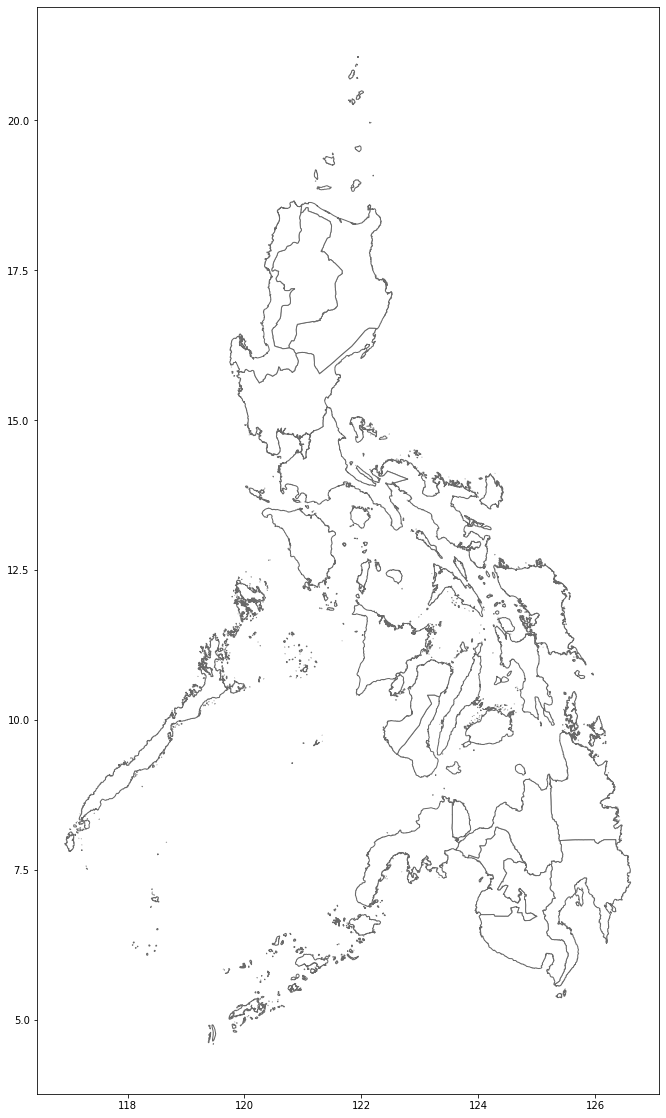

In [14]:
bax = ph_regions.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [ ]:
ax = ph_provinces.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')